Accuracy with k = 3 : 0.7272727272727273
Accuracy with k = 5 : 0.7532467532467533
Accuracy with k = 11 : 0.7597402597402597


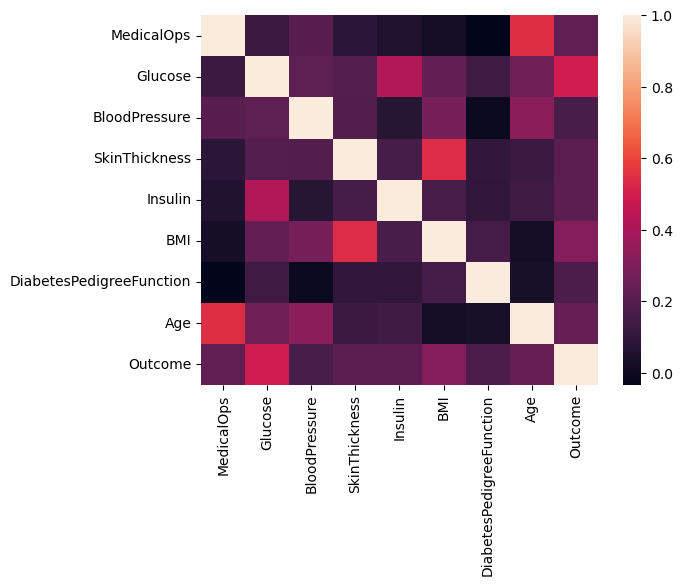

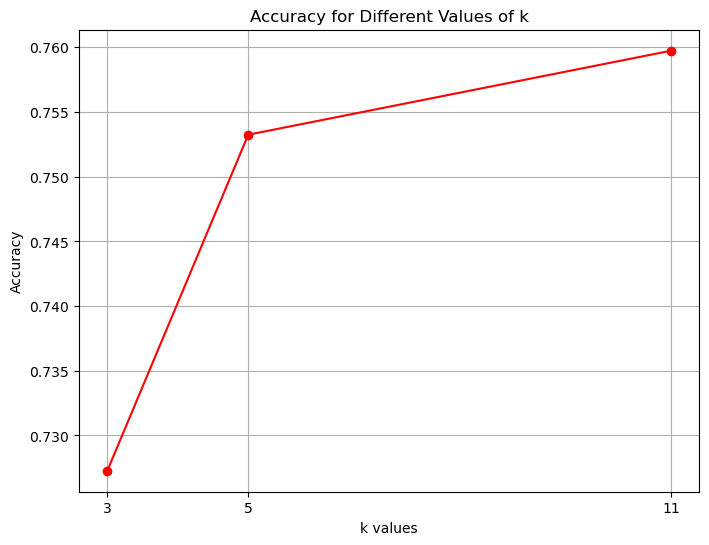

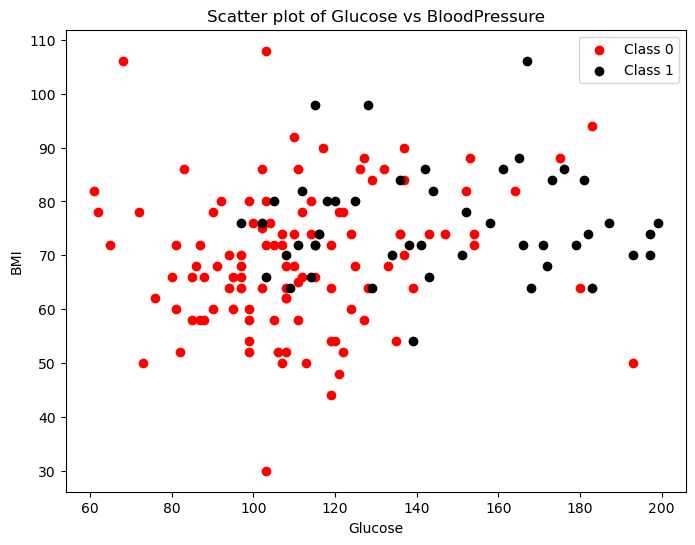

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"E:\semsester 6\ai lab\diabetes.csv")

# Handling zero values by replacing them with NaN and then with mean
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
for col in zero_not_accepted:
    data[col] = data[col].replace(0, np.NaN)
    mean = int(data[col].mean(skipna=True))
    data[col] = data[col].replace(np.NaN, mean)

# Splitting the dataset into features (X) and target variable (y)
X = data.iloc[:, 0:8]
y = data.iloc[:, 8]
sns.heatmap(data.corr())

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Euclidean distance calculation function
def euclidean_distance(instance1, instance2):
    return np.sqrt(np.sum((instance1 - instance2) ** 2))

# KNN Classifier implementation
def KNNClassifier(X_train, y_train, X_test, k):
    y_pred = []
    for test_instance in X_test:
        distances = []
        for train_instance in X_train:
            distances.append(euclidean_distance(test_instance, train_instance))
        sorted_indices = np.argsort(distances)
        k_nearest_neighbors = sorted_indices[:k]
        neighbor_labels = [y_train.iloc[i] for i in k_nearest_neighbors]
        # Predict the class label by majority
        prediction = max(set(neighbor_labels), key=neighbor_labels.count)
        y_pred.append(prediction)
    return y_pred

# Prediction function with multiple k values
def predict_multiple_k(X_train, y_train, X_test, y_test, k_values):
    results = {}
    for k in k_values:
        y_pred = KNNClassifier(X_train, y_train, X_test, k)
        accuracy = accuracy_score(y_test, y_pred)
        results[k] = accuracy
        print("Accuracy with k =", k, ":", accuracy)
    return results

# Define the k values to test
k_values_to_test = [3, 5, 11]

# Making predictions and calculating accuracy for each k
results = predict_multiple_k(X_train.values, y_train, X_test.values, y_test, k_values_to_test)

# Plotting the accuracy for different k values
plt.figure(figsize=(8, 6))
plt.plot(results.keys(), results.values(), marker='o', linestyle='-', color='red')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Values of k')
plt.xticks(k_values_to_test)
plt.grid(True)
plt.show()


# Plotting
# 1. Scatter plot for two features (e.g., Glucose and blood pressure )
plt.figure(figsize=(8, 6))
plt.scatter(X_test[y_test == 0]['Glucose'], X_test[y_test == 0]['BloodPressure'], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1]['Glucose'], X_test[y_test == 1]['BloodPressure'], color='black', label='Class 1')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.title('Scatter plot of Glucose vs BloodPressure')
plt.show()


